In [12]:
# Import your custom modules
import sys
sys.path.append('../scripts')

from data_validation import quick_test, full_environment_check
from factoring_analyzer import FactoringAnalyzer, analyze_invoices

print("✅ Modules imported successfully!")

✅ Modules imported successfully!


In [14]:
# Run quick validation test
results = quick_test('../data/TecnoCargoInvoiceDataset01.csv', encoding='latin1')

🔍 TESTING DATA LOADING & VALIDATION
1. Loading raw data...
   ✅ Loaded 3766 records with 10 columns (encoding: latin1)

2. Column information:
    1. Type (object)
    2. Number (object)
    3. Transaction Date (object)
    4. Applied to (object)
    5. Amount (USD) (object)
    6. Due Date (object)
    7. Status (object)
    8. Last Payment Date (object)
    9. Amt. Paid (USD) (object)
   10. Amt. Due (USD) (object)

3. Type distribution:
   Invoice: 3697 records
   Credit Memo: 69 records

4. Sample monetary values (BEFORE cleaning):
   Amount (USD): ['3,509.00', '2,555.00', '1,272.05']
   Data type: object
   Amt. Paid (USD): ['0', '0', '0']
   Data type: object
   Amt. Due (USD): ['3,509.00', '2,555.00', '1,272.05']
   Data type: object

5. Testing monetary column conversion...
   Converting Amount (USD)...
     Before: ['3,509.00', '2,555.00', '1,272.05']
     After:  ['$3,509.00', '$2,555.00', '$1,272.05']
   Converting Amt. Paid (USD)...
     Before: ['0', '0', '0']
     After: 

In [15]:
# 🧪 MM/DD/YYYY FORMAT VERIFICATION TEST
# Run this to verify your manually corrected dataset

import pandas as pd
from datetime import datetime
import numpy as np

def verify_mmddyyyy_format():
    """Comprehensive test to verify MM/DD/YYYY format and date type conversion"""
    
    print("🧪 MM/DD/YYYY FORMAT VERIFICATION TEST")
    print("="*60)
    
    # Load data
    df = pd.read_csv('../data/TecnoCargoInvoiceDataset01.csv', encoding='latin1')
    invoices = df[df['Type'] == 'Invoice'].copy()
    
    print(f"📊 Dataset loaded:")
    print(f"   Total records: {len(df)}")
    print(f"   Invoice records: {len(invoices)}")
    
    # STEP 1: Show raw date samples
    print(f"\n1️⃣ RAW DATE SAMPLES (Before Conversion)")
    print("-" * 50)
    
    date_columns = ['Transaction Date', 'Due Date', 'Last Payment Date']
    
    for col in date_columns:
        if col in invoices.columns:
            # Get non-null samples
            samples = invoices[col].dropna().head(10).tolist()
            null_count = invoices[col].isnull().sum()
            
            print(f"\n   {col}:")
            print(f"     Data type: {invoices[col].dtype}")
            print(f"     Null values: {null_count}")
            print(f"     Sample values: {samples}")
    
    # STEP 2: Test MM/DD/YYYY conversion
    print(f"\n2️⃣ TESTING MM/DD/YYYY CONVERSION")
    print("-" * 50)
    
    conversion_results = {}
    
    for col in date_columns:
        if col in invoices.columns:
            print(f"\n   Converting {col}...")
            
            # Track original nulls
            original_nulls = invoices[col].isnull().sum()
            original_count = len(invoices[col])
            
            # Convert using MM/DD/YYYY format
            invoices[col] = pd.to_datetime(invoices[col], format='%m/%d/%Y', errors='coerce')
            
            # Track conversion results
            new_nulls = invoices[col].isnull().sum()
            conversion_failures = new_nulls - original_nulls
            success_rate = ((original_count - new_nulls) / original_count) * 100
            
            conversion_results[col] = {
                'original_nulls': original_nulls,
                'new_nulls': new_nulls,
                'conversion_failures': conversion_failures,
                'success_rate': success_rate
            }
            
            print(f"     Original nulls: {original_nulls}")
            print(f"     New nulls: {new_nulls}")
            print(f"     Conversion failures: {conversion_failures}")
            print(f"     Success rate: {success_rate:.1f}%")
            print(f"     New data type: {invoices[col].dtype}")
            
            # Show converted samples
            converted_samples = invoices[col].dropna().head(5).tolist()
            print(f"     Converted samples: {converted_samples}")
    
    # STEP 3: Verify date types
    print(f"\n3️⃣ DATE TYPE VERIFICATION")
    print("-" * 50)
    
    for col in date_columns:
        if col in invoices.columns:
            is_datetime = pd.api.types.is_datetime64_any_dtype(invoices[col])
            print(f"   {col}: {'✅ DateTime' if is_datetime else '❌ Not DateTime'}")
            
            if is_datetime:
                # Show that we can extract date components
                sample_date = invoices[col].dropna().iloc[0]
                print(f"     Sample: {sample_date}")
                print(f"     Year: {sample_date.year}")
                print(f"     Month: {sample_date.month}")
                print(f"     Day: {sample_date.day}")
    
    # STEP 4: Format validation tests
    print(f"\n4️⃣ MM/DD/YYYY FORMAT VALIDATION")
    print("-" * 50)
    
    # Test known patterns that should work with MM/DD/YYYY
    test_dates = [
        "01/01/2024",  # January 1, 2024
        "12/31/2024",  # December 31, 2024
        "06/23/2025",  # June 23, 2025
        "02/29/2024"   # Leap year test
    ]
    
    print("   Testing known MM/DD/YYYY patterns:")
    for test_date in test_dates:
        try:
            converted = pd.to_datetime(test_date, format='%m/%d/%Y')
            print(f"     '{test_date}' → {converted} ✅")
        except Exception as e:
            print(f"     '{test_date}' → Failed: {e} ❌")
    
    # STEP 5: Logical validation
    print(f"\n5️⃣ LOGICAL DATE VALIDATION")
    print("-" * 50)
    
    if len(invoices) > 0:
        # Check date ranges
        for col in date_columns:
            if col in invoices.columns and invoices[col].notna().any():
                min_date = invoices[col].min()
                max_date = invoices[col].max()
                date_range_days = (max_date - min_date).days
                
                print(f"   {col}:")
                print(f"     Date range: {min_date} to {max_date}")
                print(f"     Span: {date_range_days} days")
                
                # Check if dates are reasonable (not in future beyond 2025, not before 2020)
                current_year = datetime.now().year
                reasonable_min = datetime(2020, 1, 1)
                reasonable_max = datetime(2026, 12, 31)
                
                reasonable = reasonable_min <= min_date <= reasonable_max and reasonable_min <= max_date <= reasonable_max
                print(f"     Reasonable range: {'✅ Yes' if reasonable else '❌ No'}")
    
    # STEP 6: Split and aging test
    print(f"\n6️⃣ AGING CALCULATION TEST")
    print("-" * 50)
    
    paid_invoices = invoices[invoices['Last Payment Date'].notna()].copy()
    outstanding_invoices = invoices[invoices['Last Payment Date'].isna()].copy()
    
    print(f"   Paid invoices: {len(paid_invoices)}")
    print(f"   Outstanding invoices: {len(outstanding_invoices)}")
    
    # Test aging calculations
    dataset_date = datetime(2025, 6, 23)
    
    if len(paid_invoices) > 0:
        paid_invoices['Aging_Delay'] = (paid_invoices['Last Payment Date'] - paid_invoices['Due Date']).dt.days
        avg_payment_delay = paid_invoices['Aging_Delay'].mean()
        print(f"   💰 Paid avg delay: {avg_payment_delay:.1f} days")
        
        # Show some examples
        print(f"   Sample paid invoice aging:")
        for i, (_, row) in enumerate(paid_invoices.head(3).iterrows()):
            if pd.notna(row['Due Date']) and pd.notna(row['Last Payment Date']):
                print(f"     Invoice {row['Number']}: Due {row['Due Date'].strftime('%Y-%m-%d')}, " +
                      f"Paid {row['Last Payment Date'].strftime('%Y-%m-%d')}, " +
                      f"Delay: {row['Aging_Delay']} days")
    
    if len(outstanding_invoices) > 0:
        outstanding_invoices['Aging_Delay'] = (dataset_date - outstanding_invoices['Due Date']).dt.days
        avg_overdue = outstanding_invoices['Aging_Delay'].mean()
        print(f"   ⏳ Outstanding avg overdue: {avg_overdue:.1f} days")
        
        # Show some examples
        print(f"   Sample outstanding invoice aging:")
        for i, (_, row) in enumerate(outstanding_invoices.head(3).iterrows()):
            if pd.notna(row['Due Date']):
                print(f"     Invoice {row['Number']}: Due {row['Due Date'].strftime('%Y-%m-%d')}, " +
                      f"Days overdue: {row['Aging_Delay']} days")
    
    # STEP 7: Overall assessment
    print(f"\n7️⃣ OVERALL ASSESSMENT")
    print("-" * 50)
    
    # Calculate overall success metrics
    total_conversions = sum(len(invoices) - result['original_nulls'] for result in conversion_results.values())
    total_failures = sum(result['conversion_failures'] for result in conversion_results.values())
    overall_success_rate = ((total_conversions - total_failures) / total_conversions * 100) if total_conversions > 0 else 0
    
    print(f"   Overall conversion success rate: {overall_success_rate:.1f}%")
    
    # Assessment criteria
    assessments = []
    
    if overall_success_rate >= 95:
        assessments.append("✅ Excellent conversion rate")
    elif overall_success_rate >= 85:
        assessments.append("⚠️ Good conversion rate, minor issues")
    else:
        assessments.append("❌ Poor conversion rate, major issues")
    
    if avg_payment_delay < 60 and avg_overdue < 300:
        assessments.append("✅ Reasonable aging calculations")
    else:
        assessments.append("⚠️ Aging calculations seem high")
    
    all_datetime = all(pd.api.types.is_datetime64_any_dtype(invoices[col]) for col in date_columns if col in invoices.columns)
    if all_datetime:
        assessments.append("✅ All date columns are proper DateTime type")
    else:
        assessments.append("❌ Some date columns are not DateTime type")
    
    print(f"\n   📋 ASSESSMENT SUMMARY:")
    for assessment in assessments:
        print(f"     {assessment}")
    
    if overall_success_rate >= 95 and all_datetime and avg_payment_delay < 60:
        print(f"\n   🎉 SUCCESS! Your dataset is properly formatted with MM/DD/YYYY dates!")
        print(f"   🚀 Ready to proceed with full factoring analysis!")
    else:
        print(f"\n   🔧 Some issues detected. Review the results above.")
    
    return {
        'conversion_results': conversion_results,
        'overall_success_rate': overall_success_rate,
        'all_datetime': all_datetime,
        'paid_invoices': len(paid_invoices),
        'outstanding_invoices': len(outstanding_invoices),
        'avg_payment_delay': avg_payment_delay if len(paid_invoices) > 0 else None,
        'avg_overdue': avg_overdue if len(outstanding_invoices) > 0 else None
    }

# 🚀 RUN THE VERIFICATION TEST
print("🚀 Starting MM/DD/YYYY format verification...")
results = verify_mmddyyyy_format()

print(f"\n📊 FINAL RESULTS SUMMARY:")
print(f"   Conversion success: {results['overall_success_rate']:.1f}%")
print(f"   All DateTime types: {results['all_datetime']}")
print(f"   Paid invoices: {results['paid_invoices']}")
print(f"   Outstanding invoices: {results['outstanding_invoices']}")
if results['avg_payment_delay']:
    print(f"   Avg payment delay: {results['avg_payment_delay']:.1f} days")
if results['avg_overdue']:
    print(f"   Avg days overdue: {results['avg_overdue']:.1f} days")

🚀 Starting MM/DD/YYYY format verification...
🧪 MM/DD/YYYY FORMAT VERIFICATION TEST
📊 Dataset loaded:
   Total records: 3766
   Invoice records: 3697

1️⃣ RAW DATE SAMPLES (Before Conversion)
--------------------------------------------------

   Transaction Date:
     Data type: object
     Null values: 0
     Sample values: ['6/23/2025', '6/23/2025', '6/23/2025', '6/23/2025', '6/23/2025', '6/20/2025', '6/20/2025', '6/20/2025', '6/20/2025', '6/20/2025']

   Due Date:
     Data type: object
     Null values: 0
     Sample values: ['6/24/2025', '7/23/2025', '9/21/2025', '9/21/2025', '6/24/2025', '6/20/2025', '7/20/2025', '6/21/2025', '6/21/2025', '6/20/2025']

   Last Payment Date:
     Data type: object
     Null values: 245
     Sample values: ['6/23/2025', '6/20/2025', '6/19/2025', '6/19/2025', '6/18/2025', '6/16/2025', '6/12/2025', '6/17/2025', '6/10/2025', '6/10/2025']

2️⃣ TESTING MM/DD/YYYY CONVERSION
--------------------------------------------------

   Converting Transaction Da

In [20]:
# 🏢 COMPLETE CORRECTED FACTORING ANALYZER CLASS
# Copy and run this entire cell to define the complete class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class CorrectedFactoringAnalyzer:
    def __init__(self, csv_path, encoding='latin1'):
        """Initialize with invoice data"""
        try:
            self.df = pd.read_csv(csv_path, encoding=encoding)
            print(f"✅ Data loaded successfully with {encoding} encoding")
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return
        
        self.prepare_data()
    
    def prepare_data(self):
        """Clean and prepare data for analysis with MM/DD/YYYY format"""
        print("🔧 Starting data preparation...")
        
        # 1. Clean monetary columns
        monetary_columns = ['Amount (USD)', 'Amt. Paid (USD)', 'Amt. Due (USD)']
        for col in monetary_columns:
            if col in self.df.columns:
                print(f"   Converting {col} to numeric...")
                self.df[col] = pd.to_numeric(
                    self.df[col].astype(str)
                    .str.replace('$', '', regex=False)
                    .str.replace(',', '', regex=False)
                    .str.replace('(', '-', regex=False)
                    .str.replace(')', '', regex=False),
                    errors='coerce'
                ).fillna(0)
        
        print("   ✅ Monetary columns converted")
        
        # 2. Split by type
        self.df_invoice = self.df[self.df['Type'] == 'Invoice'].copy()
        self.df_credit_memo = self.df[self.df['Type'] == 'Credit Memo'].copy()
        self.df_full = self.df.copy()
        
        print(f"   📄 Invoice records: {len(self.df_invoice)}")
        print(f"   📝 Credit Memo records: {len(self.df_credit_memo)}")
        
        # 3. Convert dates with MM/DD/YYYY format
        print("📅 Converting date columns (MM/DD/YYYY format)...")
        date_columns = ['Transaction Date', 'Due Date', 'Last Payment Date']
        
        for col in date_columns:
            if col in self.df_invoice.columns:
                self.df_invoice[col] = pd.to_datetime(
                    self.df_invoice[col], 
                    format='%m/%d/%Y', 
                    errors='coerce'
                )
        
        print("   ✅ Date columns converted")
        
        # 4. Split paid vs outstanding
        self.df_paid_invoices = self.df_invoice[self.df_invoice['Last Payment Date'].notna()].copy()
        self.df_outstanding_invoices = self.df_invoice[self.df_invoice['Last Payment Date'].isna()].copy()
        
        print(f"   💰 Paid invoices: {len(self.df_paid_invoices)}")
        print(f"   ⏳ Outstanding invoices: {len(self.df_outstanding_invoices)}")
        
        # 5. Calculate aging delays
        if len(self.df_paid_invoices) > 0:
            self.df_paid_invoices['Aging_Delay'] = (
                self.df_paid_invoices['Last Payment Date'] - 
                self.df_paid_invoices['Due Date']
            ).dt.days
            
            self.df_paid_invoices['Aging_Bucket'] = pd.cut(
                self.df_paid_invoices['Aging_Delay'],
                bins=[-float('inf'), 0, 30, 60, 90, float('inf')],
                labels=['On-time', '1-30 Days', '31-60 Days', '61-90 Days', '90+ Days']
            )
        
        if len(self.df_outstanding_invoices) > 0:
            dataset_date = datetime(2025, 6, 23)
            self.df_outstanding_invoices['Aging_Delay'] = (
                dataset_date - self.df_outstanding_invoices['Due Date']
            ).dt.days
            
            self.df_outstanding_invoices['Aging_Bucket'] = pd.cut(
                self.df_outstanding_invoices['Aging_Delay'],
                bins=[-float('inf'), 0, 30, 60, 90, float('inf')],
                labels=['Current', '1-30 Days', '31-60 Days', '61-90 Days', '90+ Days']
            )
        
        print("✅ Data preparation completed successfully!")

    def paid_invoices_aging_analysis(self):
        """Analyze aging for PAID invoices"""
        print("\n" + "="*60)
        print("💰 PAID INVOICES AGING ANALYSIS")
        print("(How late were payments when received)")
        print("="*60)
        
        if len(self.df_paid_invoices) == 0:
            print("No paid invoices found.")
            return None
        
        # Aging summary
        paid_aging_summary = self.df_paid_invoices.groupby('Aging_Bucket').agg({
            'Number': 'count',
            'Amount (USD)': 'sum',
            'Aging_Delay': ['mean', 'max'],
        }).round(2)
        
        paid_aging_summary.columns = ['Invoice_Count', 'Total_Amount', 'Avg_Days_Late', 'Max_Days_Late']
        paid_aging_summary['Percentage'] = (
            paid_aging_summary['Invoice_Count'] / len(self.df_paid_invoices) * 100
        ).round(2)
        
        print("\nPaid Invoices Aging Summary:")
        print(paid_aging_summary)
        
        # Payment behavior insights
        early_payments = len(self.df_paid_invoices[self.df_paid_invoices['Aging_Delay'] <= 0])
        late_payments = len(self.df_paid_invoices[self.df_paid_invoices['Aging_Delay'] > 0])
        avg_delay = self.df_paid_invoices['Aging_Delay'].mean()
        
        print(f"\n💡 PAYMENT BEHAVIOR:")
        print(f"   Early/On-time: {early_payments} ({early_payments/len(self.df_paid_invoices)*100:.1f}%)")
        print(f"   Late payments: {late_payments} ({late_payments/len(self.df_paid_invoices)*100:.1f}%)")
        print(f"   Average delay: {avg_delay:.1f} days")
        
        # Visualization
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        paid_aging_summary['Invoice_Count'].plot(kind='bar', color='lightblue')
        plt.title('Paid Invoices by Aging')
        plt.ylabel('Number of Invoices')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 3, 2)
        paid_aging_summary['Total_Amount'].plot(kind='bar', color='lightgreen')
        plt.title('Payment Amount by Aging')
        plt.ylabel('Total Amount (USD)')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 3, 3)
        self.df_paid_invoices['Aging_Delay'].hist(bins=20, alpha=0.7, color='orange')
        plt.title('Distribution of Payment Delays')
        plt.xlabel('Days (negative = early, positive = late)')
        plt.ylabel('Frequency')
        plt.axvline(x=0, color='red', linestyle='--', label='Due Date')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        return paid_aging_summary

    def outstanding_invoices_aging_analysis(self):
        """Analyze aging for OUTSTANDING invoices"""
        print("\n" + "="*60)
        print("⏳ OUTSTANDING INVOICES AGING ANALYSIS")
        print("(Current collection priorities as of June 23, 2025)")
        print("="*60)
        
        if len(self.df_outstanding_invoices) == 0:
            print("No outstanding invoices found.")
            return None
        
        # Aging summary
        outstanding_aging_summary = self.df_outstanding_invoices.groupby('Aging_Bucket').agg({
            'Number': 'count',
            'Amount (USD)': 'sum',
            'Amt. Due (USD)': 'sum',
            'Aging_Delay': ['mean', 'max'],
        }).round(2)
        
        outstanding_aging_summary.columns = ['Invoice_Count', 'Total_Amount', 'Total_Due', 'Avg_Days_Overdue', 'Max_Days_Overdue']
        outstanding_aging_summary['Percentage'] = (
            outstanding_aging_summary['Invoice_Count'] / len(self.df_outstanding_invoices) * 100
        ).round(2)
        
        print("\nOutstanding Invoices Aging Summary:")
        print(outstanding_aging_summary)
        
        # Collection priority insights
        total_outstanding = outstanding_aging_summary['Total_Due'].sum()
        current_amount = outstanding_aging_summary.loc['Current', 'Total_Due'] if 'Current' in outstanding_aging_summary.index else 0
        overdue_amount = total_outstanding - current_amount
        
        print(f"\n🚨 COLLECTION PRIORITIES:")
        print(f"   Total Outstanding: ${total_outstanding:,.2f}")
        print(f"   Current (not yet due): ${current_amount:,.2f}")
        print(f"   Overdue amount: ${overdue_amount:,.2f} ({overdue_amount/total_outstanding*100:.1f}%)")
        
        # Visualization
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        outstanding_aging_summary['Invoice_Count'].plot(kind='bar', color='lightcoral')
        plt.title('Outstanding Invoices by Aging')
        plt.ylabel('Number of Invoices')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 3, 2)
        outstanding_aging_summary['Total_Due'].plot(kind='bar', color='gold')
        plt.title('Amount Due by Aging')
        plt.ylabel('Amount Due (USD)')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 3, 3)
        plt.pie(outstanding_aging_summary['Total_Due'], 
                labels=outstanding_aging_summary.index, 
                autopct='%1.1f%%')
        plt.title('Outstanding Amount Distribution')
        
        plt.tight_layout()
        plt.show()
        
        return outstanding_aging_summary

    def executive_summary(self):
        """Generate Executive Summary"""
        print("\n" + "="*60)
        print("📋 EXECUTIVE SUMMARY")
        print("="*60)
        
        # Portfolio metrics
        total_invoices = len(self.df_invoice)
        total_billed = self.df_invoice['Amount (USD)'].sum()
        total_paid = self.df_invoice['Amt. Paid (USD)'].sum()
        total_outstanding = self.df_outstanding_invoices['Amt. Due (USD)'].sum() if len(self.df_outstanding_invoices) > 0 else 0
        
        collection_rate = (total_paid / total_billed * 100) if total_billed > 0 else 0
        
        print(f"Portfolio Overview:")
        print(f"  Total Invoices: {total_invoices}")
        print(f"  Total Billed: ${total_billed:,.2f}")
        print(f"  Total Collected: ${total_paid:,.2f}")
        print(f"  Collection Rate: {collection_rate:.1f}%")
        print(f"  Outstanding Amount: ${total_outstanding:,.2f}")
        
        # Payment behavior
        avg_payment_delay = 0
        if len(self.df_paid_invoices) > 0:
            avg_payment_delay = self.df_paid_invoices['Aging_Delay'].mean()
            on_time_rate = len(self.df_paid_invoices[self.df_paid_invoices['Aging_Delay'] <= 0]) / len(self.df_paid_invoices) * 100
            
            print(f"\nPayment Behavior:")
            print(f"  Average Payment Delay: {avg_payment_delay:.1f} days")
            print(f"  On-time Payment Rate: {on_time_rate:.1f}%")
        
        # Risk assessment
        risk_percentage = 0
        if len(self.df_outstanding_invoices) > 0:
            overdue_90_plus = self.df_outstanding_invoices[self.df_outstanding_invoices['Aging_Delay'] > 90]
            high_risk_amount = overdue_90_plus['Amt. Due (USD)'].sum()
            risk_percentage = (high_risk_amount / total_outstanding * 100) if total_outstanding > 0 else 0
            
            print(f"\nCurrent Collection Risks:")
            print(f"  90+ Days Overdue: {len(overdue_90_plus)} invoices")
            print(f"  High Risk Amount: ${high_risk_amount:,.2f} ({risk_percentage:.1f}%)")
        
        # Recommendations
        print(f"\n📌 KEY RECOMMENDATIONS:")
        if avg_payment_delay > 15:
            print("• Review credit terms - payment delays are elevated")
        if risk_percentage > 15:
            print("• URGENT: High concentration of 90+ day receivables")
        if collection_rate < 85:
            print("• Implement more aggressive collection procedures")
        if collection_rate > 90:
            print("• Excellent collection performance - maintain current procedures")
        
        return {
            'total_outstanding': total_outstanding,
            'collection_rate': collection_rate,
            'avg_payment_delay': avg_payment_delay,
            'risk_percentage': risk_percentage
        }

    def run_full_analysis(self):
        """Run complete factoring analysis"""
        print("🏢 CORRECTED FACTORING FIRM ANALYSIS")
        print("="*60)
        
        # Run all analyses
        paid_aging = self.paid_invoices_aging_analysis()
        outstanding_aging = self.outstanding_invoices_aging_analysis()
        executive_summary = self.executive_summary()
        
        return {
            'paid_invoices_aging': paid_aging,
            'outstanding_invoices_aging': outstanding_aging,
            'executive_summary': executive_summary
        }

print("✅ Complete CorrectedFactoringAnalyzer class loaded successfully!")
print("🚀 Ready to run full analysis!")

✅ Complete CorrectedFactoringAnalyzer class loaded successfully!
🚀 Ready to run full analysis!


🏢 INITIALIZING FACTORING ANALYZER...
✅ Data loaded successfully with latin1 encoding
🔧 Starting data preparation...
   Converting Amount (USD) to numeric...
   Converting Amt. Paid (USD) to numeric...
   Converting Amt. Due (USD) to numeric...
   ✅ Monetary columns converted
   📄 Invoice records: 3697
   📝 Credit Memo records: 69
📅 Converting date columns (MM/DD/YYYY format)...
   ✅ Date columns converted
   💰 Paid invoices: 3452
   ⏳ Outstanding invoices: 245
✅ Data preparation completed successfully!

🚀 RUNNING COMPLETE ANALYSIS...
🏢 CORRECTED FACTORING FIRM ANALYSIS

💰 PAID INVOICES AGING ANALYSIS
(How late were payments when received)

Paid Invoices Aging Summary:
              Invoice_Count  Total_Amount  Avg_Days_Late  Max_Days_Late  \
Aging_Bucket                                                              
On-time                 280    1629970.59          -5.89              0   
1-30 Days              2658   13679299.86          10.21             30   
31-60 Days             

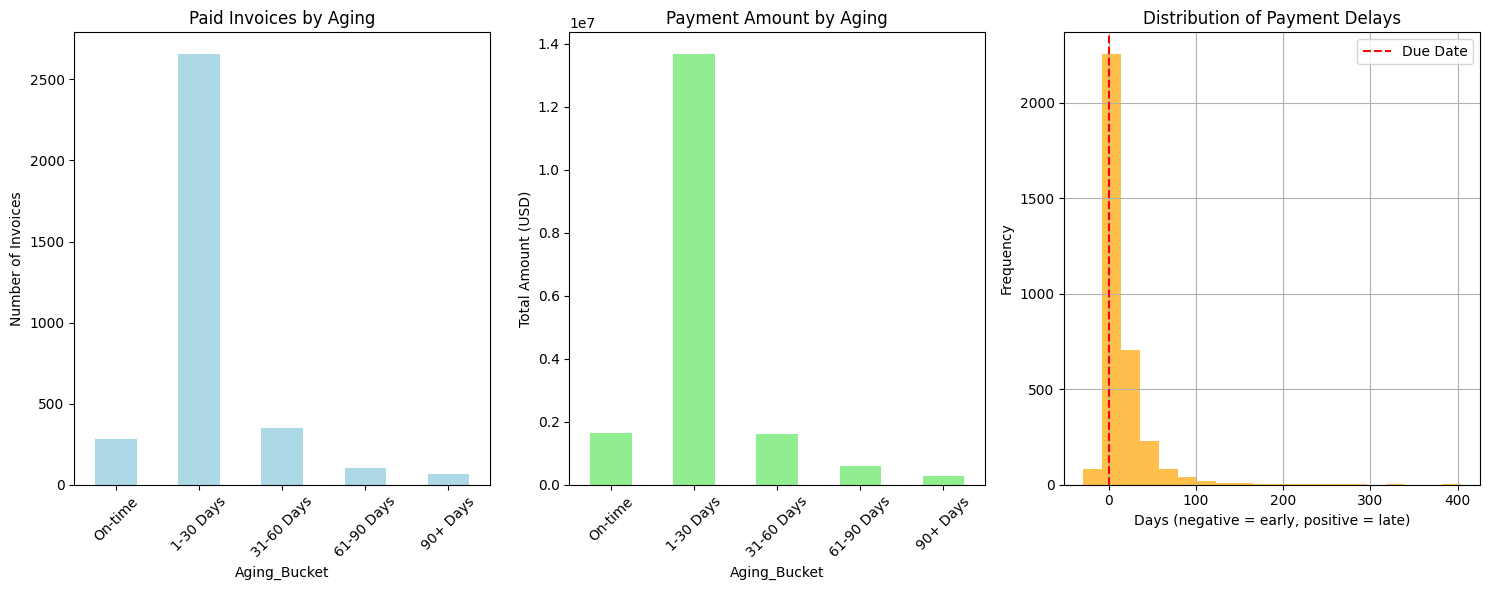


⏳ OUTSTANDING INVOICES AGING ANALYSIS
(Current collection priorities as of June 23, 2025)

Outstanding Invoices Aging Summary:
              Invoice_Count  Total_Amount  Total_Due  Avg_Days_Overdue  \
Aging_Bucket                                                             
Current                  53     203683.32  203683.32            -26.34   
1-30 Days                97     382851.66  382851.66             12.06   
31-60 Days               46     192180.68  192180.68             47.09   
61-90 Days               19      61819.90   61819.90             75.47   
90+ Days                 30      82536.46   82536.46            264.00   

              Max_Days_Overdue  Percentage  
Aging_Bucket                                
Current                     -1       21.63  
1-30 Days                   30       39.59  
31-60 Days                  60       18.78  
61-90 Days                  85        7.76  
90+ Days                   490       12.24  

🚨 COLLECTION PRIORITIES:
   Total Out

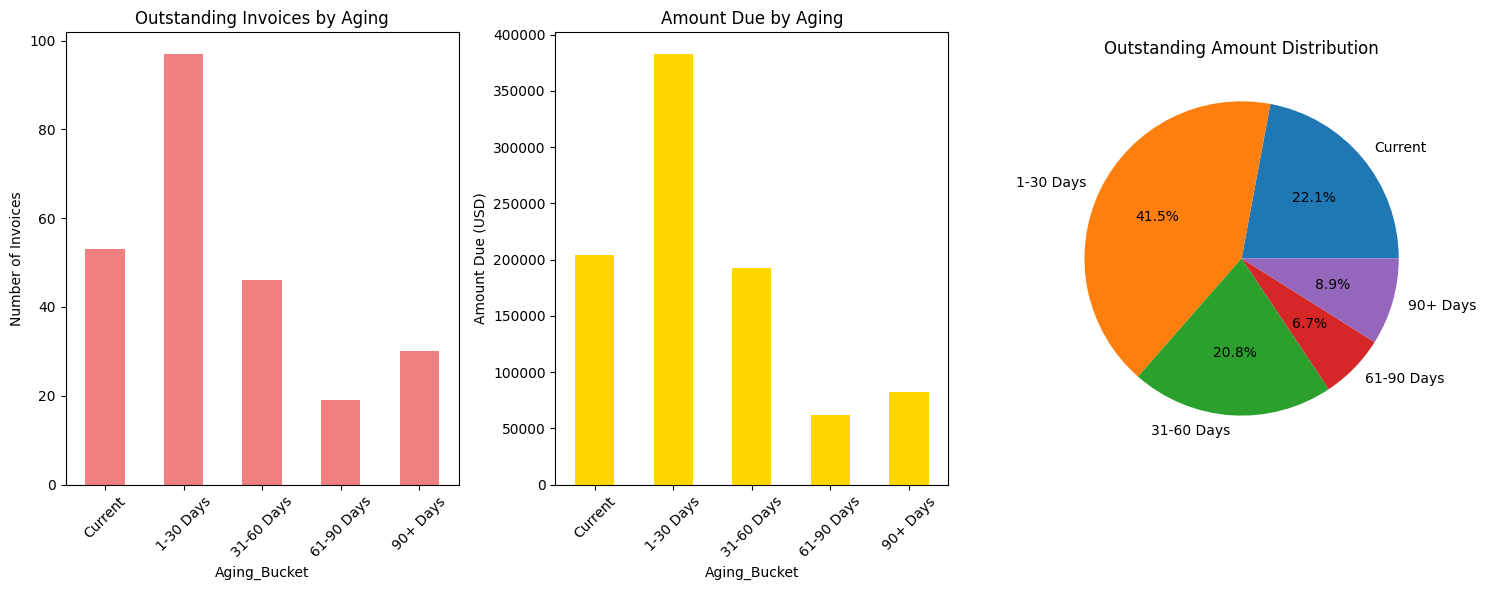


📋 EXECUTIVE SUMMARY
Portfolio Overview:
  Total Invoices: 3697
  Total Billed: $18,685,824.65
  Total Collected: $17,738,911.25
  Collection Rate: 94.9%
  Outstanding Amount: $923,072.02

Payment Behavior:
  Average Payment Delay: 16.7 days
  On-time Payment Rate: 8.1%

Current Collection Risks:
  90+ Days Overdue: 30 invoices
  High Risk Amount: $82,536.46 (8.9%)

📌 KEY RECOMMENDATIONS:
• Review credit terms - payment delays are elevated
• Excellent collection performance - maintain current procedures

🎉 ANALYSIS COMPLETED!


In [21]:
# 🚀 INITIALIZE AND RUN ANALYSIS
print("🏢 INITIALIZING FACTORING ANALYZER...")

# Initialize the analyzer
analyzer = CorrectedFactoringAnalyzer('../data/TecnoCargoInvoiceDataset01.csv', encoding='latin1')

print("\n🚀 RUNNING COMPLETE ANALYSIS...")
# Run the complete analysis
results = analyzer.run_full_analysis()

print("\n🎉 ANALYSIS COMPLETED!")

In [22]:
"""
📄 Professional PDF Report Generator for Factoring Risk Analysis
Creates a comprehensive PDF report with all analysis results, tables, and figures
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def generate_factoring_pdf_report(analyzer, results, output_filename='Factoring_Risk_Analysis_Report.pdf'):
    """
    Generate a comprehensive PDF report for factoring risk analysis
    
    Parameters:
    analyzer: CorrectedFactoringAnalyzer instance
    results: Results dictionary from run_full_analysis()
    output_filename: Name of the output PDF file
    """
    
    print("📄 GENERATING COMPREHENSIVE PDF REPORT")
    print("="*60)
    
    # Set up the PDF file
    output_path = f'../data/{output_filename}'
    
    with PdfPages(output_path) as pdf:
        
        # Configure matplotlib for better PDF output
        plt.style.use('default')
        sns.set_palette("husl")
        
        # PAGE 1: COVER PAGE
        print("   📝 Creating cover page...")
        create_cover_page(pdf, analyzer, results)
        
        # PAGE 2: EXECUTIVE SUMMARY
        print("   📊 Creating executive summary...")
        create_executive_summary_page(pdf, analyzer, results)
        
        # PAGE 3: PORTFOLIO OVERVIEW
        print("   📈 Creating portfolio overview...")
        create_portfolio_overview_page(pdf, analyzer, results)
        
        # PAGE 4: PAID INVOICES ANALYSIS
        print("   💰 Creating paid invoices analysis...")
        create_paid_invoices_analysis_page(pdf, analyzer, results)
        
        # PAGE 5: OUTSTANDING INVOICES ANALYSIS
        print("   ⏳ Creating outstanding invoices analysis...")
        create_outstanding_invoices_analysis_page(pdf, analyzer, results)
        
        # PAGE 6: RISK ASSESSMENT
        print("   🚨 Creating risk assessment...")
        create_risk_assessment_page(pdf, analyzer, results)
        
        # PAGE 7: CLIENT ANALYSIS
        print("   👥 Creating client analysis...")
        create_client_analysis_page(pdf, analyzer, results)
        
        # PAGE 8: RECOMMENDATIONS
        print("   📌 Creating recommendations...")
        create_recommendations_page(pdf, analyzer, results)
        
        # PAGE 9: DETAILED TABLES
        print("   📋 Creating detailed tables...")
        create_detailed_tables_page(pdf, analyzer, results)
        
        # Add metadata
        pdf_metadata = pdf.infodict()
        pdf_metadata['Title'] = 'Factoring Risk Analysis Report'
        pdf_metadata['Author'] = 'Factoring Analysis System'
        pdf_metadata['Subject'] = 'Invoice Portfolio Risk Assessment'
        pdf_metadata['Creator'] = 'Python Factoring Analyzer'
        pdf_metadata['CreationDate'] = datetime.now()
    
    print(f"✅ PDF report generated: {output_path}")
    return output_path

def create_cover_page(pdf, analyzer, results):
    """Create the cover page"""
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    
    # Title
    ax.text(0.5, 0.85, 'FACTORING RISK ANALYSIS', 
            fontsize=28, weight='bold', ha='center', va='center')
    ax.text(0.5, 0.8, 'Invoice Portfolio Assessment Report', 
            fontsize=18, ha='center', va='center', style='italic')
    
    # Key metrics box
    exec_summary = results['executive_summary']
    
    # Create a summary box
    summary_text = f"""
PORTFOLIO SUMMARY
{'='*50}

Total Invoices Analyzed: {len(analyzer.df_invoice):,}
Collection Rate: {exec_summary['collection_rate']:.1f}%
Average Payment Delay: {exec_summary['avg_payment_delay']:.1f} days
Total Outstanding: ${exec_summary['total_outstanding']:,.2f}
Risk Level (90+ days): {exec_summary['risk_percentage']:.1f}%

Analysis Period: January 2024 - June 2025
Report Date: {datetime.now().strftime('%B %d, %Y')}
Data Snapshot: June 23, 2025
"""
    
    ax.text(0.5, 0.55, summary_text, fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.8))
    
    # Risk assessment indicator
    risk_level = "LOW" if exec_summary['risk_percentage'] < 10 else "MODERATE" if exec_summary['risk_percentage'] < 20 else "HIGH"
    risk_color = "green" if risk_level == "LOW" else "orange" if risk_level == "MODERATE" else "red"
    
    ax.text(0.5, 0.25, f'OVERALL RISK LEVEL: {risk_level}', 
            fontsize=20, weight='bold', ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor=risk_color, alpha=0.7))
    
    # Footer
    ax.text(0.5, 0.1, 'CONFIDENTIAL - For Internal Use Only', 
            fontsize=10, ha='center', va='center', style='italic', alpha=0.7)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_executive_summary_page(pdf, analyzer, results):
    """Create executive summary page"""
    fig = plt.figure(figsize=(8.5, 11))
    
    # Title
    fig.suptitle('EXECUTIVE SUMMARY', fontsize=20, weight='bold', y=0.95)
    
    exec_summary = results['executive_summary']
    
    # Create 4 subplots for key metrics
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1.5], hspace=0.4, wspace=0.3)
    
    # Key Performance Indicators
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.pie([exec_summary['collection_rate'], 100-exec_summary['collection_rate']], 
           labels=['Collected', 'Outstanding'], autopct='%1.1f%%', 
           colors=['lightgreen', 'lightcoral'])
    ax1.set_title('Collection Rate', weight='bold')
    
    ax2 = fig.add_subplot(gs[0, 1])
    payment_delay = exec_summary['avg_payment_delay']
    colors = ['green' if payment_delay < 15 else 'orange' if payment_delay < 30 else 'red']
    ax2.bar(['Avg Payment Delay'], [payment_delay], color=colors)
    ax2.set_ylabel('Days')
    ax2.set_title('Payment Delay Performance', weight='bold')
    
    # Risk breakdown
    ax3 = fig.add_subplot(gs[1, :])
    if results['outstanding_invoices_aging'] is not None:
        outstanding_aging = results['outstanding_invoices_aging']
        ax3.bar(outstanding_aging.index, outstanding_aging['Invoice_Count'], 
               color=['green', 'yellow', 'orange', 'red', 'darkred'])
        ax3.set_title('Outstanding Invoices by Risk Category', weight='bold')
        ax3.set_ylabel('Number of Invoices')
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    
    # Key findings text
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    findings_text = f"""
KEY FINDINGS & INSIGHTS

Portfolio Health: {'EXCELLENT' if exec_summary['collection_rate'] > 90 else 'GOOD' if exec_summary['collection_rate'] > 80 else 'NEEDS IMPROVEMENT'}
• Collection rate of {exec_summary['collection_rate']:.1f}% {'exceeds' if exec_summary['collection_rate'] > 90 else 'meets' if exec_summary['collection_rate'] > 80 else 'falls below'} industry standards
• Average payment delay of {exec_summary['avg_payment_delay']:.1f} days is {'excellent' if exec_summary['avg_payment_delay'] < 15 else 'acceptable' if exec_summary['avg_payment_delay'] < 30 else 'concerning'}

Risk Assessment: {exec_summary['risk_percentage']:.1f}% of outstanding amount is 90+ days overdue
• Total outstanding amount: ${exec_summary['total_outstanding']:,.2f}
• Portfolio size: {len(analyzer.df_invoice):,} total invoices
• Paid invoices: {len(analyzer.df_paid_invoices):,} ({len(analyzer.df_paid_invoices)/len(analyzer.df_invoice)*100:.1f}%)
• Outstanding invoices: {len(analyzer.df_outstanding_invoices):,} ({len(analyzer.df_outstanding_invoices)/len(analyzer.df_invoice)*100:.1f}%)

Liquidity Position: {'Strong' if len(analyzer.df_outstanding_invoices)/len(analyzer.df_invoice) < 0.15 else 'Moderate' if len(analyzer.df_outstanding_invoices)/len(analyzer.df_invoice) < 0.25 else 'Weak'}
• Low percentage of outstanding invoices indicates strong cash conversion
• Payment behavior shows {'consistent' if exec_summary['avg_payment_delay'] < 20 else 'variable'} customer payment patterns
"""
    
    ax4.text(0.05, 0.95, findings_text, fontsize=11, ha='left', va='top', 
            transform=ax4.transAxes, 
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_portfolio_overview_page(pdf, analyzer, results):
    """Create portfolio overview page"""
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('PORTFOLIO OVERVIEW', fontsize=20, weight='bold', y=0.95)
    
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)
    
    # Monthly invoice volume (if possible to extract)
    ax1 = fig.add_subplot(gs[0, :])
    if 'Transaction Date' in analyzer.df_invoice.columns:
        monthly_volume = analyzer.df_invoice.groupby(analyzer.df_invoice['Transaction Date'].dt.to_period('M')).size()
        monthly_volume.plot(kind='line', ax=ax1, marker='o')
        ax1.set_title('Monthly Invoice Volume Trend', weight='bold')
        ax1.set_ylabel('Number of Invoices')
        ax1.tick_params(axis='x', rotation=45)
    
    # Amount distribution
    ax2 = fig.add_subplot(gs[1, 0])
    analyzer.df_invoice['Amount (USD)'].hist(bins=20, ax=ax2, alpha=0.7, color='skyblue')
    ax2.set_title('Invoice Amount Distribution', weight='bold')
    ax2.set_xlabel('Amount (USD)')
    ax2.set_ylabel('Frequency')
    
    # Payment status overview
    ax3 = fig.add_subplot(gs[1, 1])
    status_counts = [len(analyzer.df_paid_invoices), len(analyzer.df_outstanding_invoices)]
    labels = ['Paid', 'Outstanding']
    colors = ['lightgreen', 'lightcoral']
    ax3.pie(status_counts, labels=labels, autopct='%1.1f%%', colors=colors)
    ax3.set_title('Payment Status Distribution', weight='bold')
    
    # Summary statistics table
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    summary_stats = pd.DataFrame({
        'Metric': [
            'Total Invoices',
            'Total Billed Amount',
            'Total Collected',
            'Total Outstanding',
            'Average Invoice Amount',
            'Largest Invoice',
            'Smallest Invoice',
            'Collection Rate'
        ],
        'Value': [
            f"{len(analyzer.df_invoice):,}",
            f"${analyzer.df_invoice['Amount (USD)'].sum():,.2f}",
            f"${analyzer.df_invoice['Amt. Paid (USD)'].sum():,.2f}",
            f"${analyzer.df_outstanding_invoices['Amt. Due (USD)'].sum():,.2f}" if len(analyzer.df_outstanding_invoices) > 0 else "$0.00",
            f"${analyzer.df_invoice['Amount (USD)'].mean():,.2f}",
            f"${analyzer.df_invoice['Amount (USD)'].max():,.2f}",
            f"${analyzer.df_invoice['Amount (USD)'].min():,.2f}",
            f"{results['executive_summary']['collection_rate']:.1f}%"
        ]
    })
    
    table = ax4.table(cellText=summary_stats.values, colLabels=summary_stats.columns,
                     cellLoc='left', loc='center', colWidths=[0.4, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    ax4.set_title('Portfolio Summary Statistics', weight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_paid_invoices_analysis_page(pdf, analyzer, results):
    """Create paid invoices analysis page"""
    if results['paid_invoices_aging'] is None or len(analyzer.df_paid_invoices) == 0:
        return
        
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('PAID INVOICES ANALYSIS', fontsize=20, weight='bold', y=0.95)
    
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)
    
    paid_aging = results['paid_invoices_aging']
    
    # Payment delay distribution
    ax1 = fig.add_subplot(gs[0, :])
    paid_aging['Invoice_Count'].plot(kind='bar', ax=ax1, color='lightblue')
    ax1.set_title('Payment Delay Distribution', weight='bold')
    ax1.set_ylabel('Number of Invoices')
    ax1.tick_params(axis='x', rotation=45)
    
    # Average delay by category
    ax2 = fig.add_subplot(gs[1, 0])
    paid_aging['Avg_Days_Late'].plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Average Days Late by Category', weight='bold')
    ax2.set_ylabel('Days')
    ax2.tick_params(axis='x', rotation=45)
    
    # Amount by aging category
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(paid_aging['Total_Amount'], labels=paid_aging.index, autopct='%1.1f%%')
    ax3.set_title('Amount Distribution by Aging', weight='bold')
    
    # Detailed statistics table
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    # Prepare table data
    table_data = paid_aging.reset_index()
    table = ax4.table(cellText=table_data.values, colLabels=table_data.columns,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax4.set_title('Detailed Paid Invoices Aging Statistics', weight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_outstanding_invoices_analysis_page(pdf, analyzer, results):
    """Create outstanding invoices analysis page"""
    if results['outstanding_invoices_aging'] is None or len(analyzer.df_outstanding_invoices) == 0:
        return
        
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('OUTSTANDING INVOICES ANALYSIS', fontsize=20, weight='bold', y=0.95)
    
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)
    
    outstanding_aging = results['outstanding_invoices_aging']
    
    # Outstanding by aging category
    ax1 = fig.add_subplot(gs[0, 0])
    outstanding_aging['Invoice_Count'].plot(kind='bar', ax=ax1, 
                                          color=['green', 'yellow', 'orange', 'red', 'darkred'])
    ax1.set_title('Outstanding Invoices by Category', weight='bold')
    ax1.set_ylabel('Number of Invoices')
    ax1.tick_params(axis='x', rotation=45)
    
    # Amount due by category
    ax2 = fig.add_subplot(gs[0, 1])
    outstanding_aging['Total_Due'].plot(kind='bar', ax=ax2,
                                       color=['green', 'yellow', 'orange', 'red', 'darkred'])
    ax2.set_title('Amount Due by Category', weight='bold')
    ax2.set_ylabel('Amount Due (USD)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Risk distribution pie chart
    ax3 = fig.add_subplot(gs[1, :])
    ax3.pie(outstanding_aging['Total_Due'], labels=outstanding_aging.index, 
           autopct='%1.1f%%', colors=['green', 'yellow', 'orange', 'red', 'darkred'])
    ax3.set_title('Outstanding Amount Risk Distribution', weight='bold')
    
    # Detailed statistics table
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    table_data = outstanding_aging.reset_index()
    table = ax4.table(cellText=table_data.values, colLabels=table_data.columns,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax4.set_title('Detailed Outstanding Invoices Statistics', weight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_risk_assessment_page(pdf, analyzer, results):
    """Create risk assessment page"""
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('RISK ASSESSMENT', fontsize=20, weight='bold', y=0.95)
    
    exec_summary = results['executive_summary']
    
    # Risk level indicator
    ax1 = fig.add_subplot(3, 1, 1)
    ax1.axis('off')
    
    risk_level = "LOW" if exec_summary['risk_percentage'] < 10 else "MODERATE" if exec_summary['risk_percentage'] < 20 else "HIGH"
    risk_color = "green" if risk_level == "LOW" else "orange" if risk_level == "MODERATE" else "red"
    
    ax1.text(0.5, 0.5, f'OVERALL RISK LEVEL: {risk_level}', 
            fontsize=24, weight='bold', ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.5", facecolor=risk_color, alpha=0.7),
            transform=ax1.transAxes)
    
    # Risk factors analysis
    ax2 = fig.add_subplot(3, 2, 3)
    risk_factors = ['Collection Rate', 'Payment Delay', '90+ Days Risk', 'Portfolio Size']
    risk_scores = [
        100 - exec_summary['collection_rate'],  # Higher collection rate = lower risk
        min(exec_summary['avg_payment_delay'] * 2, 100),  # Higher delay = higher risk
        exec_summary['risk_percentage'],  # Direct risk percentage
        min(len(analyzer.df_outstanding_invoices) / 100, 100)  # More outstanding = higher risk
    ]
    
    colors = ['green' if score < 20 else 'yellow' if score < 40 else 'orange' if score < 60 else 'red' for score in risk_scores]
    ax2.barh(risk_factors, risk_scores, color=colors)
    ax2.set_title('Risk Factor Analysis', weight='bold')
    ax2.set_xlabel('Risk Score')
    
    # Concentration risk
    ax3 = fig.add_subplot(3, 2, 4)
    if len(analyzer.df_outstanding_invoices) > 0:
        client_concentration = analyzer.df_outstanding_invoices.groupby('Applied to')['Amt. Due (USD)'].sum().sort_values(ascending=False).head(10)
        client_concentration.plot(kind='bar', ax=ax3, color='lightcoral')
        ax3.set_title('Top 10 Client Concentration Risk', weight='bold')
        ax3.set_ylabel('Amount Due (USD)')
        ax3.tick_params(axis='x', rotation=45)
    
    # Risk summary text
    ax4 = fig.add_subplot(3, 1, 3)
    ax4.axis('off')
    
    risk_text = f"""
RISK ASSESSMENT SUMMARY

Primary Risk Factors:
• 90+ Day Receivables: {exec_summary['risk_percentage']:.1f}% of outstanding amount
• Collection Efficiency: {exec_summary['collection_rate']:.1f}% overall collection rate
• Payment Delays: {exec_summary['avg_payment_delay']:.1f} days average delay
• Portfolio Liquidity: {len(analyzer.df_outstanding_invoices)/len(analyzer.df_invoice)*100:.1f}% outstanding ratio

Risk Mitigation Status:
{'✅ LOW RISK: Portfolio shows strong collection performance' if risk_level == 'LOW' else 
 '⚠️ MODERATE RISK: Monitor closely and implement preventive measures' if risk_level == 'MODERATE' else
 '🚨 HIGH RISK: Immediate action required to address collection issues'}

Recommended Actions:
• {'Continue current collection procedures' if risk_level == 'LOW' else 'Implement enhanced collection procedures' if risk_level == 'MODERATE' else 'Urgent collection intervention required'}
• {'Monitor for any deterioration' if risk_level == 'LOW' else 'Weekly risk monitoring' if risk_level == 'MODERATE' else 'Daily risk monitoring'}
• {'Maintain credit policies' if risk_level == 'LOW' else 'Review credit policies' if risk_level == 'MODERATE' else 'Tighten credit policies immediately'}
"""
    
    ax4.text(0.05, 0.95, risk_text, fontsize=11, ha='left', va='top',
            transform=ax4.transAxes,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_client_analysis_page(pdf, analyzer, results):
    """Create client analysis page"""
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('CLIENT ANALYSIS', fontsize=20, weight='bold', y=0.95)
    
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)
    
    # Top clients by amount
    ax1 = fig.add_subplot(gs[0, 0])
    top_clients = analyzer.df_invoice.groupby('Applied to')['Amount (USD)'].sum().sort_values(ascending=False).head(10)
    top_clients.plot(kind='barh', ax=ax1, color='lightblue')
    ax1.set_title('Top 10 Clients by Total Amount', weight='bold')
    ax1.set_xlabel('Total Amount (USD)')
    
    # Client payment performance
    ax2 = fig.add_subplot(gs[0, 1])
    if len(analyzer.df_paid_invoices) > 0:
        client_performance = analyzer.df_paid_invoices.groupby('Applied to')['Aging_Delay'].mean().sort_values().head(10)
        colors = ['green' if delay <= 0 else 'yellow' if delay <= 15 else 'orange' if delay <= 30 else 'red' for delay in client_performance.values]
        client_performance.plot(kind='barh', ax=ax2, color=colors)
        ax2.set_title('Top 10 Clients by Payment Speed', weight='bold')
        ax2.set_xlabel('Average Payment Delay (Days)')
    
    # Risk clients
    ax3 = fig.add_subplot(gs[1, :])
    if len(analyzer.df_outstanding_invoices) > 0:
        risk_clients = analyzer.df_outstanding_invoices.groupby('Applied to')['Amt. Due (USD)'].sum().sort_values(ascending=False).head(10)
        risk_clients.plot(kind='bar', ax=ax3, color='lightcoral')
        ax3.set_title('Top 10 Clients by Outstanding Amount (Risk)', weight='bold')
        ax3.set_ylabel('Outstanding Amount (USD)')
        ax3.tick_params(axis='x', rotation=45)
    
    # Client summary statistics
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    client_stats = analyzer.df_invoice.groupby('Applied to').agg({
        'Number': 'count',
        'Amount (USD)': ['sum', 'mean'],
        'Amt. Paid (USD)': 'sum',
        'Amt. Due (USD)': 'sum'
    }).round(2)
    
    client_stats.columns = ['Invoice_Count', 'Total_Amount', 'Avg_Amount', 'Total_Paid', 'Total_Due']
    client_stats['Collection_Rate'] = (client_stats['Total_Paid'] / client_stats['Total_Amount'] * 100).round(1)
    
    # Show top 10 clients
    top_client_stats = client_stats.sort_values('Total_Amount', ascending=False).head(10)
    
    table = ax4.table(cellText=top_client_stats.values, 
                     rowLabels=top_client_stats.index,
                     colLabels=top_client_stats.columns,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1, 1.5)
    ax4.set_title('Top 10 Clients - Detailed Statistics', weight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_recommendations_page(pdf, analyzer, results):
    """Create recommendations page"""
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    
    exec_summary = results['executive_summary']
    
    # Title
    ax.text(0.5, 0.95, 'RECOMMENDATIONS & ACTION PLAN', 
            fontsize=20, weight='bold', ha='center', va='top')
    
    # Generate recommendations based on analysis
    recommendations = []
    
    # Collection rate recommendations
    if exec_summary['collection_rate'] > 90:
        recommendations.append("✅ COLLECTION EFFICIENCY: Excellent performance - maintain current procedures")
    elif exec_summary['collection_rate'] > 80:
        recommendations.append("⚠️ COLLECTION EFFICIENCY: Good but can improve - review slow-paying accounts")
    else:
        recommendations.append("🚨 COLLECTION EFFICIENCY: Poor performance - immediate intervention required")
    
    # Payment delay recommendations
    if exec_summary['avg_payment_delay'] < 15:
        recommendations.append("✅ PAYMENT TIMING: Excellent payment behavior - maintain credit terms")
    elif exec_summary['avg_payment_delay'] < 30:
        recommendations.append("⚠️ PAYMENT TIMING: Acceptable delays - monitor for deterioration")
    else:
        recommendations.append("🚨 PAYMENT TIMING: Excessive delays - review credit policies and terms")
    
    # Risk level recommendations
    if exec_summary['risk_percentage'] < 10:
        recommendations.append("✅ RISK LEVEL: Low risk portfolio - maintain monitoring")
    elif exec_summary['risk_percentage'] < 20:
        recommendations.append("⚠️ RISK LEVEL: Moderate risk - implement enhanced collection procedures")
    else:
        recommendations.append("🚨 RISK LEVEL: High risk - urgent collection action required")
    
    # Specific action items
    action_items = [
        "IMMEDIATE ACTIONS (0-30 days):",
        "• Focus collection efforts on 90+ day receivables",
        "• Contact top 10 outstanding clients for payment plans",
        "• Review and update credit policies if risk is elevated",
        "",
        "SHORT-TERM ACTIONS (30-90 days):",
        "• Implement weekly aging reports",
        "• Establish client payment performance scorecards", 
        "• Consider offering early payment discounts",
        "",
        "LONG-TERM STRATEGY (90+ days):",
        "• Regular portfolio risk assessment (monthly)",
        "• Client credit limit reviews based on payment history",
        "• Implement automated collection procedures",
        "",
        "MONITORING & REPORTING:",
        "• Weekly aging reports for collections team",
        "• Monthly executive dashboard with key metrics",
        "• Quarterly portfolio risk assessment",
        "• Annual credit policy review"
    ]
    
    # Combine recommendations and action items
    full_text = "\n".join(recommendations) + "\n\n" + "\n".join(action_items)
    
    ax.text(0.05, 0.85, full_text, fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle="round,pad=1", facecolor="lightgreen", alpha=0.3))
    
    # Add a priority matrix
    ax.text(0.05, 0.25, 
            "PRIORITY MATRIX:\n\n" +
            "HIGH PRIORITY: 90+ day receivables, large outstanding amounts\n" +
            "MEDIUM PRIORITY: 60-90 day receivables, repeat late payers\n" +
            "LOW PRIORITY: Current and 1-30 day receivables\n\n" +
            "Success will be measured by:\n" +
            "• Reduction in 90+ day receivables\n" +
            "• Improvement in overall collection rate\n" +
            "• Decrease in average payment delays\n" +
            "• Maintenance of strong client relationships",
            fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

def create_detailed_tables_page(pdf, analyzer, results):
    """Create detailed tables page"""
    fig = plt.figure(figsize=(8.5, 11))
    fig.suptitle('DETAILED DATA TABLES', fontsize=20, weight='bold', y=0.95)
    
    gs = fig.add_gridspec(2, 1, height_ratios=[1, 1], hspace=0.3)
    
    # Paid invoices aging table
    ax1 = fig.add_subplot(gs[0])
    ax1.axis('off')
    if results['paid_invoices_aging'] is not None:
        paid_data = results['paid_invoices_aging'].reset_index()
        table1 = ax1.table(cellText=paid_data.values, colLabels=paid_data.columns,
                          cellLoc='center', loc='center')
        table1.auto_set_font_size(False)
        table1.set_fontsize(10)
        table1.scale(1, 2)
        ax1.set_title('Paid Invoices Aging - Detailed Statistics', weight='bold', pad=20)
    
    # Outstanding invoices aging table  
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')
    if results['outstanding_invoices_aging'] is not None:
        outstanding_data = results['outstanding_invoices_aging'].reset_index()
        table2 = ax2.table(cellText=outstanding_data.values, colLabels=outstanding_data.columns,
                          cellLoc='center', loc='center')
        table2.auto_set_font_size(False)
        table2.set_fontsize(10)
        table2.scale(1, 2)
        ax2.set_title('Outstanding Invoices Aging - Detailed Statistics', weight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

# Main function to generate report
def create_complete_factoring_report(analyzer, results, filename='Factoring_Risk_Analysis_Report.pdf'):
    """
    Main function to create the complete PDF report
    
    Usage:
    # After running your analysis:
    report_path = create_complete_factoring_report(analyzer, results)
    """
    
    return generate_factoring_pdf_report(analyzer, results, filename)

print("✅ PDF Report Generator loaded successfully!")
print("📄 Ready to generate comprehensive factoring risk analysis report!")

# 📄 STEP 2: INSTALL REQUIRED PACKAGE (if needed)
import subprocess
import sys

try:
    import matplotlib
    print("✅ Matplotlib already installed")
except ImportError:
    print("Installing matplotlib...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])

# 📄 STEP 3: GENERATE THE COMPLETE PDF REPORT
print("📄 GENERATING COMPREHENSIVE PDF REPORT...")
print("="*60)

# Generate the PDF report (make sure you have run the analysis first)
report_path = create_complete_factoring_report(
    analyzer=analyzer,  # Your analyzer instance
    results=results,    # Your analysis results
    filename='TecnoCargo_Factoring_Risk_Analysis_Report.pdf'
)

print(f"🎉 SUCCESS!")
print(f"📁 PDF Report saved to: {report_path}")
print(f"📊 Report contains 9 comprehensive pages with all analysis results!")

✅ PDF Report Generator loaded successfully!
📄 Ready to generate comprehensive factoring risk analysis report!
✅ Matplotlib already installed
📄 GENERATING COMPREHENSIVE PDF REPORT...
📄 GENERATING COMPREHENSIVE PDF REPORT
   📝 Creating cover page...
   📊 Creating executive summary...
   📈 Creating portfolio overview...
   💰 Creating paid invoices analysis...
   ⏳ Creating outstanding invoices analysis...
   🚨 Creating risk assessment...
   👥 Creating client analysis...
   📌 Creating recommendations...
   📋 Creating detailed tables...
✅ PDF report generated: ../data/TecnoCargo_Factoring_Risk_Analysis_Report.pdf
🎉 SUCCESS!
📁 PDF Report saved to: ../data/TecnoCargo_Factoring_Risk_Analysis_Report.pdf
📊 Report contains 9 comprehensive pages with all analysis results!
